<a href="https://colab.research.google.com/github/ADI33352/Data-science-material/blob/main/handling_numerical_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df =pd.read_csv('/content/toys_data - Sheet1.csv')

In [6]:
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1.0,0.0
1,38.0,71.2833,1.0,1.0
2,26.0,7.9250,0.0,1.0
3,35.0,53.1000,1.0,1.0
4,35.0,8.0500,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      852 non-null    float64
 2   Family    885 non-null    float64
 3   Survived  714 non-null    float64
dtypes: float64(4)
memory usage: 28.0 KB


In [11]:
df.isnull().mean()*100

Age          0.000000
Fare         4.377104
Family       0.673401
Survived    19.865320
dtype: float64

In [12]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
X_train.isnull().mean()*100

Age       0.000000
Fare      4.213483
Family    0.842697
dtype: float64

In [18]:
mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

mean_family = df['Family'].mean()
median_family = df['Family'].median()

In [19]:
X_train['fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['fare_mean'] = X_train['Fare'].fillna(mean_fare)

X_train['family_median'] = X_train['Family'].fillna(median_family)
X_train['family_mean'] = X_train['Family'].fillna(mean_family)

In [22]:
print('Original fare variable variance: ', X_train['Fare'].var())
print('fare Variance after median imputation: ', X_train['fare_median'].var())
print('fare Variance after mean imputation: ', X_train['fare_mean'].var())

Original fare variable variance:  2418.0173064659457
fare Variance after median imputation:  2328.299548201694
fare Variance after mean imputation:  2315.9944374093584


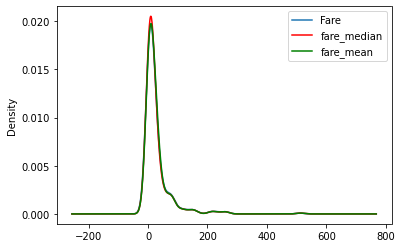

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
print('Original family variable variance: ', X_train['Family'].var())
print('family Variance after median imputation: ', X_train['family_median'].var())
print('family Variance after mean imputation: ', X_train['family_mean'].var())

Original family variable variance:  1.9616177445603038
family Variance after median imputation:  1.9509078841321763
family Variance after mean imputation:  1.9450662822899805


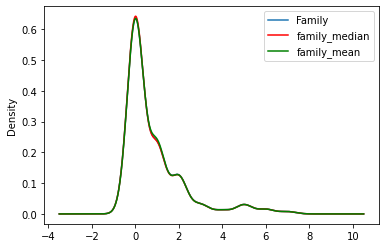

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Family'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['family_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['family_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<AxesSubplot:>

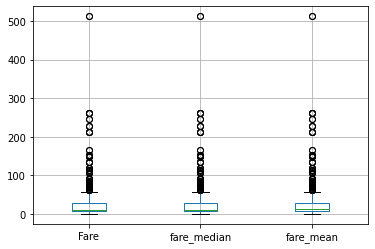

In [27]:
X_train[['Fare', 'fare_median', 'fare_mean']].boxplot()

<AxesSubplot:>

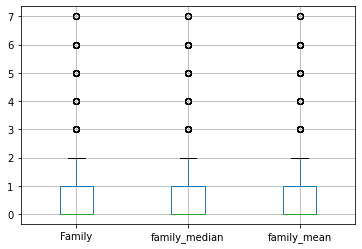

In [29]:
X_train[['Family', 'family_median', 'family_mean']].boxplot()

using *sklearn*

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [34]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Fare']),
    ('imputer2',imputer2,['Family'])
],remainder = 'passthrough')

In [35]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Fare']),
                                ('imputer2', SimpleImputer(), ['Family'])])

In [36]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [37]:
X_train

array([[ 27.7208,   0.    ,  40.    ],
       [ 16.7   ,   2.    ,   4.    ],
       [  9.    ,   0.    ,  47.    ],
       ...,
       [ 49.5042,   0.    ,  71.    ],
       [  0.    ,   0.    , 221.7792],
       [  0.    ,   0.    ,  25.925 ]])